# K_mean phân loại chữ viết tay trên cơ sở dữ liệu MNIST
source: https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html

Bộ cơ sở dữ liệu MNIST, bộ cơ sở dữ liệu về chữ số viết tay.
1. MNIST gồm 2 tập : training set (60 nghìn mẫu khác nhau từ 0 đến 9), test set gồm 10 nghìn mẫu khác nhau.Tất cả đều được gán nhãn.
2. Mỗi bức ảnh là một ảnh xám (chỉ có 1 channel) kích thước 28.28 (tổng cộng 784 pixel). Mỗi pixel mang giá trị từ 0 đến 255 (đen -> trắng).

Cài đặt thư viện và tải dữ liệu

In [1]:
%load_ext autoreload
%autoreload 2
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

Tải và xem dữ liệu

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X.shape)
print(y.shape)
print(y)

(70000, 784)
(70000,)
['5' '0' '4' ... '4' '5' '6']


split data

In [3]:
train_samples = 5000
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_test)

(5000, 784)
(10000, 784)
['3' '2' '6' ... '9' '8' '3']


In [5]:
from sklearn.cluster import KMeans

In [6]:
model = KMeans(n_clusters = 10).fit(X_train)
print('Centers found by scikit-learn:')
print(model.cluster_centers_)
pred_label = model.predict(X_test)
print(pred_label)
print(pred_label.shape)

Centers found by scikit-learn:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[8 6 3 ... 1 8 8]
(10000,)


In [7]:
unique1, counts1 = np.unique(y_test, return_counts=True)
a = dict(zip(unique1, counts1))
unique2, counts2 = np.unique(pred_label, return_counts=True)
b = dict(zip(unique2, counts2))
print(a)
print(b)

{'0': 1008, '1': 1097, '2': 997, '3': 1066, '4': 996, '5': 868, '6': 929, '7': 1092, '8': 983, '9': 964}
{0: 1032, 1: 1498, 2: 889, 3: 1444, 4: 955, 5: 780, 6: 726, 7: 660, 8: 1281, 9: 735}


In [ ]:
Chọn 200 điểm dữ liệu 

In [8]:
N = 200
X = X_train[np.random.choice(X_train.shape[0], N)]/255.

In [9]:
print(X.shape)

(200, 784)


Hiển thị 200 điểm dữ liệu, hiển thị các centrer

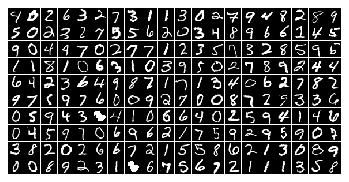

In [10]:
from display_network import * 
from matplotlib.backends.backend_pdf import PdfPages


plt.axis('off')
A = display_network(X.T, 10, 20)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.savefig('mnist_ex.png', bbox_inches='tight', dpi = 600)
plt.show()


In [11]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

K = 10          # number of clusters 
N = 10000       # number of samples 
X = X_train[np.random.choice(X_train.shape[0], N)]
kmeans = KMeans(n_clusters=K).fit(X)
pred_label = kmeans.predict(X)

Hiển thị các center

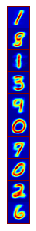

In [12]:
plt.axis('off')
A = display_network(kmeans.cluster_centers_.T, 10, 1)
f2 = plt.imshow(A, interpolation='nearest',cmap = plt.cm.jet )

plt.savefig('mnist_centroids.png', bbox_inches='tight', dpi = 600)
plt.show()
